In [34]:
import sklearn.datasets

from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
credit_data = sklearn.datasets.fetch_openml('credit-g')

In [7]:
print(credit_data.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit data**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
      Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Pe

In [11]:
credit_df = pd.DataFrame(credit_data.data, columns=credit_data.feature_names)
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0


In [49]:
credit_df['GOOD'] = credit_data.target

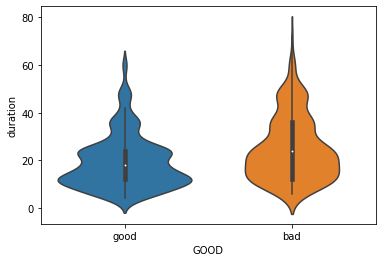

In [59]:
sns.violinplot(y='duration', x="GOOD", data=credit_df)

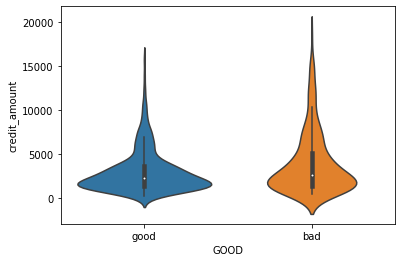

In [60]:
sns.violinplot(y='credit_amount', x="GOOD", data=credit_df)

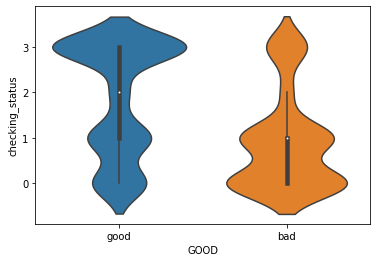

In [61]:
sns.violinplot(y='checking_status', x="GOOD", data=credit_df)

In [58]:
pd.crosstab(credit_df['job'], credit_data.target)

col_0,bad,good
job,,
0.0,7,15
1.0,56,144
2.0,186,444
3.0,51,97


In [62]:
pd.crosstab(credit_df['checking_status'], credit_data.target)

col_0,bad,good
checking_status,,
0.0,135,139
1.0,105,164
2.0,14,49
3.0,46,348


In [18]:
list(enumerate(credit_data.feature_names, start=1))

[(1, 'checking_status'),
 (2, 'duration'),
 (3, 'credit_history'),
 (4, 'purpose'),
 (5, 'credit_amount'),
 (6, 'savings_status'),
 (7, 'employment'),
 (8, 'installment_commitment'),
 (9, 'personal_status'),
 (10, 'other_parties'),
 (11, 'residence_since'),
 (12, 'property_magnitude'),
 (13, 'age'),
 (14, 'other_payment_plans'),
 (15, 'housing'),
 (16, 'existing_credits'),
 (17, 'job'),
 (18, 'num_dependents'),
 (19, 'own_telephone'),
 (20, 'foreign_worker')]

In [24]:
paid_back = credit_data.target == 'good'
paid_back

array([ True, False,  True,  True, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
        True, False,

In [16]:
credit_df.checking_status.value_counts()

3.0    394
0.0    274
1.0    269
2.0     63
Name: checking_status, dtype: int64

In [37]:
numerical_columns = 'duration credit_amount installment_commitment residence_since age existing_credits num_dependents'.split()
categorical_columns = 'checking_status credit_history purpose savings_status employment personal_status other_parties property_magnitude other_payment_plans housing job own_telephone foreign_worker'.split()
print(len(numerical_columns), len(categorical_columns))
column_trans = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(dtype='int', categories='auto', drop='first'), categorical_columns),
    remainder='drop')

7 13


In [38]:
train_X, test_X, train_y, test_y = train_test_split(credit_df, paid_back, test_size=.1, random_state=0)
print('train X', train_X.shape, 'y', train_y.shape)

train X (900, 20) y (900,)


In [39]:
column_trans.fit(train_X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['duration', 'credit_amount',
                                  'installment_commitment', 'residence_since',
                                  'age', 'existing_credits',
                                  'num_dependents']),
                                ('onehotencoder',
                                 OneHotEncoder(categorical_features=None,
                                               categories='auto', drop='first',
                                               dtype='int',
                                               handle_unknown='error',
                                               n_values=None, sparse=True),
                           

In [42]:
train_X_xformed = column_trans.transform(train_X)
test_X_xformed = column_trans.transform(test_X)
print(train_X_xformed.shape)

(900, 48)


In [36]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [43]:
clf = LinearRegression().fit(train_X_xformed, train_y)

(array([11., 17., 23., 40., 51., 56., 34., 29.,  9.,  5.]),
 array([-0.98813089, -0.88444356, -0.78075623, -0.6770689 , -0.57338157,
        -0.46969424, -0.36600691, -0.26231959, -0.15863226, -0.05494493,
         0.0487424 ]),
 <a list of 10 Patch objects>)

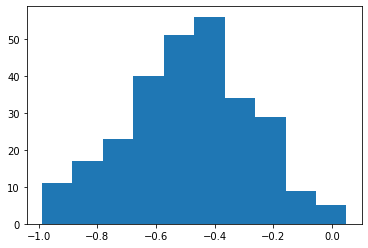

In [46]:
train_predicted = clf.predict(train_X_xformed)
resid = train_y - train_predicted
plt.hist(resid[train_y == 0])

(array([ 10.,  28.,  70., 136., 154., 202., 155., 110.,  32.,   3.]),
 array([-0.0487424 ,  0.09561631,  0.23997502,  0.38433373,  0.52869244,
         0.67305115,  0.81740986,  0.96176857,  1.10612728,  1.25048599,
         1.3948447 ]),
 <a list of 10 Patch objects>)

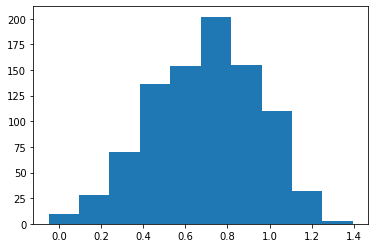

In [47]:
plt.hist(train_predicted)

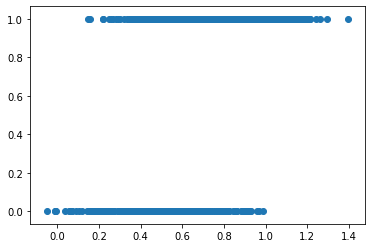

In [48]:
plt.scatter(train_predicted, train_y)